## 1. Data Loading and Preparation
Loading synthetic healthcare encounter data to analyze patient movement across facilities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data 
encounters = pd.read_csv("encounters.csv")
orgs = pd.read_csv("organizations.csv")

## 2. Data Cleaning and Preprocessing

Preparing the dataset by:
- Matching patient encounters to facility names
- Converting dates to datetime format for chronological sorting
- Reconstructing patient medical timelines

In [2]:
# Data cleaning #
# Matching "ORGANIZATION" from visits to "Id" from the hospital list
df = pd.merge(encounters, orgs, left_on="ORGANIZATION", right_on="Id")

# Needed columns for the workflow
df = df[["PATIENT", "START", "NAME"]]

# Converting text dates to datetime objects for accurate chronological sorting
df["START"] = pd.to_datetime(df["START"])

# Sorting by patient and then by date to reconstruct the medical history
df = df.sort_values(by=["PATIENT", "START"])

## 3. Analysis: Healthcare Fragmentation Patterns

### Objective
Quantify how many different facilities each patient visits. Higher facility counts indicate greater fragmentation and increased risk of incomplete medication histories.

### Method
- Count unique facilities per patient
- Calculate average fragmentation using NumPy
- Visualize distribution to identify patterns


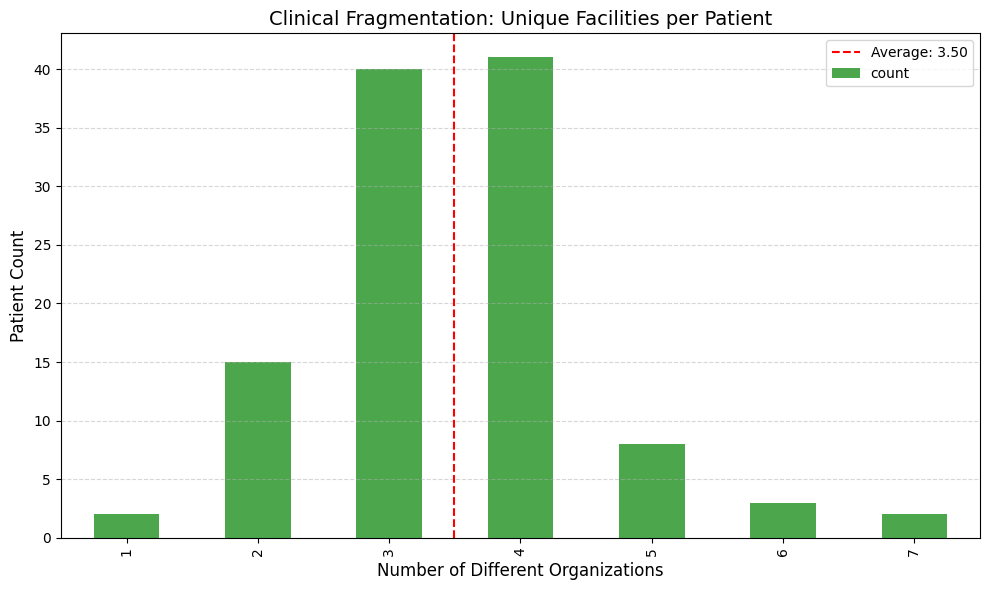

In [3]:
# Analysis 1: Quantifying fragmentation #
# Counting unique hospitals per patient
hospitals_per_patient = df.groupby("PATIENT")["NAME"].nunique()

# Calculating the average (mean) using NumPy
avg_hospitals = np.mean(hospitals_per_patient.values)

# Visualizing fragmentation
plt.figure(figsize=(10, 6))
hospitals_per_patient.value_counts().sort_index().plot(kind="bar", color="green", alpha=0.7)

# Adding the average line using the NumPy result
plt.axvline(x=avg_hospitals - 1, color="red", linestyle="--", label=f"Average: {avg_hospitals:.2f}")

plt.title("Clinical Fragmentation: Unique Facilities per Patient", fontsize=14)
plt.xlabel("Number of Different Organizations", fontsize=12)
plt.ylabel("Patient Count", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("figures/fragmentation_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


### Key Findings - Fragmentation Analysis

**Dataset Overview:**
- Total patients analyzed: **111**
- Multi-facility patients: **109 (98.2%)**

**Fragmentation Patterns:**
- Average facilities per patient: **3.50**
- Most common pattern: **4 facilities** per patient
- Only **2 patients (1.8%)** received all care at single facility
- **94 patients (84.7%)** visited 3 or more facilities

**Clinical Significance:**
The high fragmentation rate (98.2% multi-facility) demonstrates that nearly all patients in this healthcare system experience information discontinuity. With an average of 3.5 facilities per patient, medication histories are highly fragmented, creating systematic risk for duplication errors.


## 4. Analysis: High-Risk Care Transitions

### Objective
Identify which facilities are most frequently involved in patient handoffs. These represent critical points where medication information exchange is essential.

### Method
- Track patient movement between facilities (care transitions)
- Identify "jumps" where patients switch facilities
- Rank facilities by number of outbound transitions


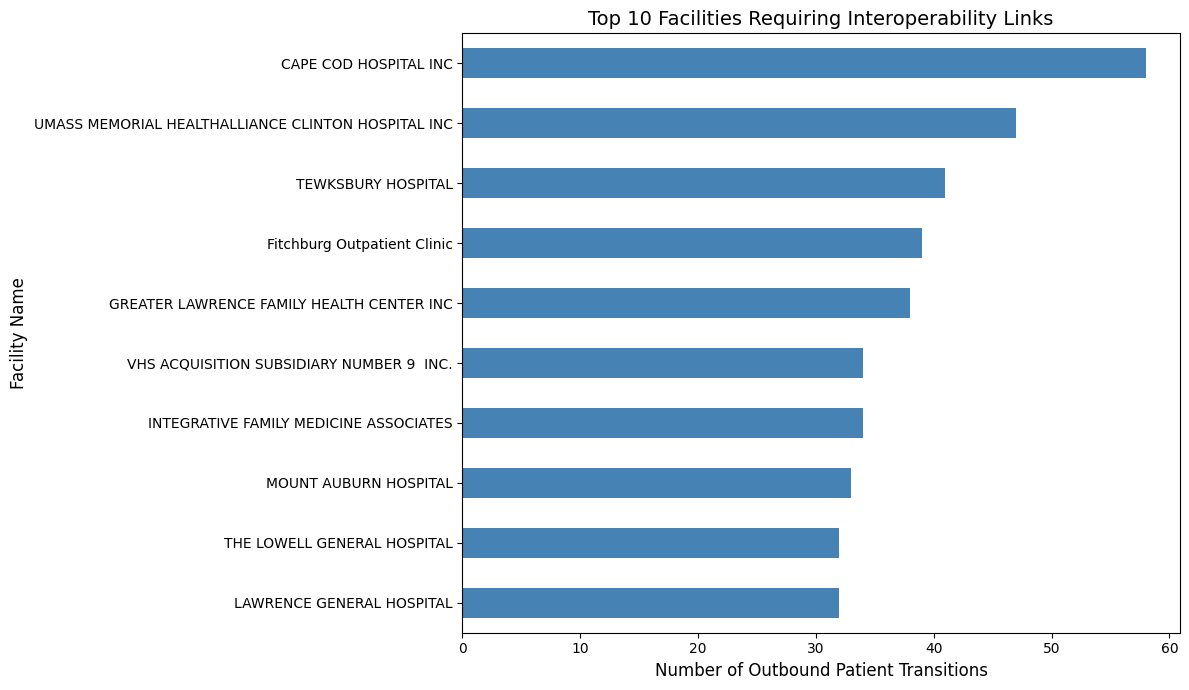

Average fragmentation: 3.50


In [4]:
# Analysis 2: Care transitioning #
# Identifying the "next" hospital in the patient's timeline
df["NEXT_HOSPITAL"] = df.groupby("PATIENT")["NAME"].shift(-1)

# Filtering for "Jumps" (where the facility changed)
jumps = df[df["NAME"] != df["NEXT_HOSPITAL"]].copy()
jumps = jumps.dropna(subset=["NEXT_HOSPITAL"])

# Identifying the top 10 Busiest Hubs for Patient Transitions
top_jumps = jumps["NAME"].value_counts().head(10)

# Visualizing interoperability hubs
plt.figure(figsize=(12, 7))
top_jumps.plot(kind="barh", color="steelblue")
plt.title("Top 10 Facilities Requiring Interoperability Links", fontsize=14)
plt.xlabel("Number of Outbound Patient Transitions", fontsize=12)
plt.ylabel("Facility Name", fontsize=12)
plt.gca().invert_yaxis()  # Puts the busiest hospital at the top
plt.tight_layout()
plt.savefig("figures/facility_transitions.png", dpi=300, bbox_inches="tight")
plt.show()

print(f"Average fragmentation: {avg_hospitals:.2f}")

### Key Findings - Care Transition Analysis

**Transition Volume:**
- Total care transitions identified: **2,207**
- Average transitions per multi-facility patient: **20.2**

**High-Risk Transition Hubs:**
- Top facility for outbound transitions: **CAPE COD HOSPITAL INC**
- Transitions from top facility: **58 handoffs**
- Top 10 facilities account for significant proportion of system-wide transitions

**Clinical Implications:**
CAPE COD HOSPITAL INC and other high-volume facilities represent critical nodes requiring robust health information exchange infrastructure. With 2,207 care transitions across 111 patients, each transition represents a potential point of medication information loss. 

These facilities are priority targets for:
- Health Information Exchange (HIE) implementation
- Standardized medication reconciliation protocols
- Clinical decision support system integration
- Real-time prescription monitoring programs

## 5. Conclusions and Informatics Implications

### Summary of Findings

This analysis of 111 patients across synthetic healthcare encounters revealed:

1. **Extreme System Fragmentation:** 98.2% of patients visited multiple facilities (average: 3.5 facilities per patient)
2. **High Transaction Volume:** 2,207 care transitions identified, averaging 20+ transitions per patient
3. **Critical Transition Hubs:** CAPE COD HOSPITAL INC leads with 58 outbound transitions, representing a key interoperability priority
4. **Systematic Risk:** With most patients visiting 4+ facilities, medication information fragmentation is the norm, not the exception

### Clinical Risk Assessment

**High-Risk Population:**
- 94 patients (84.7%) visited 3+ facilities
- Each additional facility increases probability of incomplete medication history
- 2,207 transitions = 2,207 opportunities for information loss

**Priority Intervention Points:**
- Top 10 facilities account for majority of system transitions
- Targeting these hubs with HIE would cover most at-risk patients
- CAPE COD HOSPITAL INC represents single highest-impact intervention point


### Limitations

- Synthetic data may not fully represent real-world care patterns
- Analysis identifies risk conditions, not actual medication errors
- Does not track specific medication classes or duplication events
- Temporal patterns (time between transitions) not analyzed
- Patient outcomes and actual harm not measured

### Future Work

**Immediate Extensions:**
- Calculate time intervals between transitions (urgent vs. routine)

**Advanced Applications:**
- Develop predictive model for high-risk transitions
- Integrate prescription monitoring program (PMP) data
- Create real-time alert system for multi-facility patients
- Cost-benefit analysis of HIE implementation prioritization

### Conclusion

This analysis provides quantitative evidence that medication information fragmentation is a system-level problem requiring informatics solutions. With 98.2% of patients experiencing multi-facility care and averaging 3.5 facilities each, individual clinical vigilance cannot compensate for lack of interoperability infrastructure. The identification of high-volume transition hubs (led by CAPE COD HOSPITAL INC with 58 transitions) enables evidence-based prioritization of Health Information Exchange implementation—a core application of biomedical informatics to patient safety improvement.
